In [2]:
import sympy as sp
import stressTransformations as st 
import matplotlib.pyplot as plt 
import numpy as np 
from IPython.display import Image

Rafael Beltrán Hernández

# Barra Soportada en rodamientos 

Antes de empezar, se establecen las condiciones de equilibrio que nos ayduan a encontrar las reacciones.
\begin{equation}
    \sum M_a = 0 \\
    \sum F_y = 0
\end{equation}
Esto correponde a reacciones de $R_a$ y $R_b$ iguales a 2.1 y 1.4 kN respectivamente. Los diagramas de cortante y momento flector son:

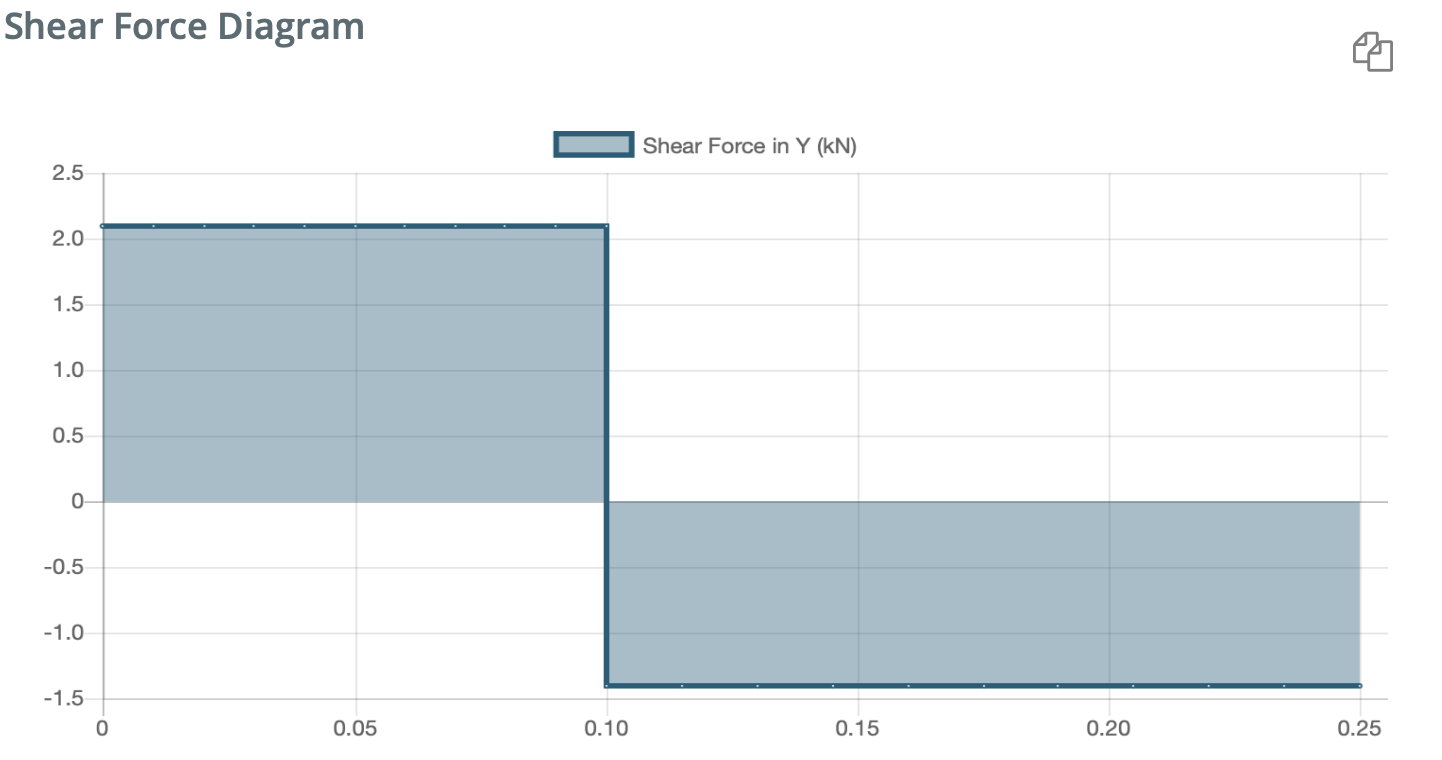

In [3]:
Image(filename='Imagenes Tareas/Shear S6 P1.png')

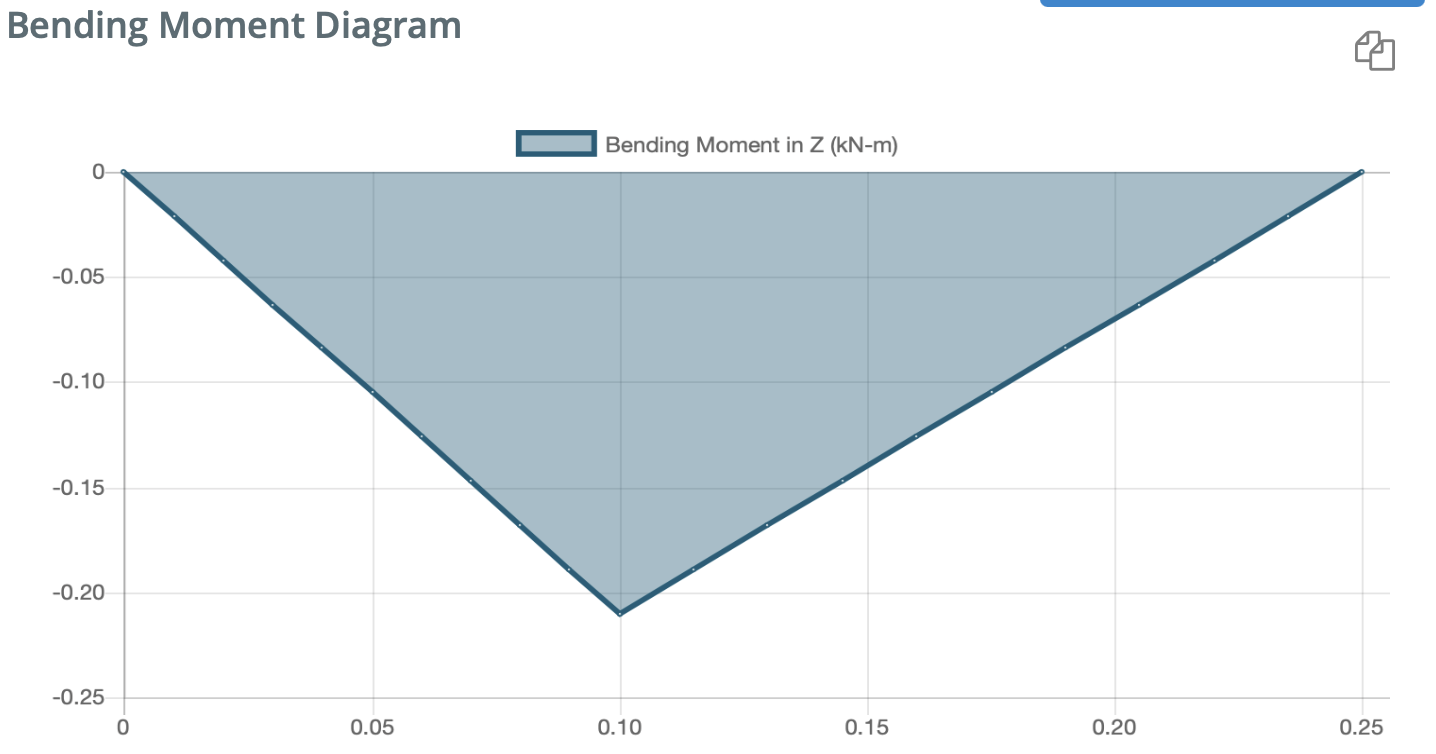

In [4]:
Image(filename='Imagenes Tareas/Moment S6 P1.png')

**Método de Doble Integración**

La función de $V(x)$ y $M(x)$ están definidas a trozos, uno antes de la carga puntual y el otro después. Es decir:

Para cortante:
\begin{equation}
     V(x) =
    \begin{cases}
        R_a \; \forall \; x \in [0,0.1] \\
        R_b \; \forall \; x \in (0.1,L]
    \end{cases}
\end{equation}

Para momento flector:
\begin{equation}
     M(x) =
    \begin{cases}
        -R_a x \; \forall \; x \in [0,0.1] \\
        -R_b x + a F \; \forall \; x \in (0.1,L]
    \end{cases}
\end{equation}

Partiendo de la definición de delfexión $\ddot{y} = M/EI$ se encuentran las expresiones para ambos trozos de la deflexión:
\begin{equation}
    \dot{y}_1 = (1/EI)\bigg(\frac{-R_a x^2}{2} + c_1 \bigg) \\
    y_1 = (1/EI) \bigg(\frac{-R_a x^3}{6} + c_1 x + c_2 \bigg)
\end{equation}
\begin{equation}
    \dot{y}_2 = (1/EI)\bigg(\frac{-R_b x^2}{2} + a F x + k_1 \bigg) \\
    y_2 = (1/EI) \bigg(\frac{-R_b x^3}{6} + a F x^2/2 + k_1 x + k_2 \bigg)
\end{equation}

Para encontrar los valores de las constantes de integración $C_i$ y $K_i$ se establecen las condiciones de frontera:
* $y(0)=0$ De aqui se tiene que $C_2 =0$
* $y(L) = 0$ Lo que nos indica que: 
\begin{equation}
    0 = \frac{-R_b L^3}{6} + a F L^2 /2 + k_1 L + k_2
\end{equation}
* $y_1(a)-y_2(a)=0$:
\begin{equation}
    -\frac{a^3 Ra }{6} + a c_1  + \frac{a^3 R_b}{6} - a^3 F/2  - a k_1 - k_2 = 0
\end{equation}
* Las derivadas son iguales en $x=0.1=a$:
\begin{equation}
    \frac{-R_a a^2}{2} +  c_1 + \frac{R_b a^2}{2} - a^2F   - k_1 = 0
\end{equation}

Entonces se tiene 3 ecuaciones con 3 incognitas, que serán solucionadas usando la libreria Sympy

In [25]:
# Valores conocidos
F = 3500
Ra = 2100
Rb = 1400
L = 0.25
a = 0.1
# Declaración de incognitas
c1 , k1, k2 = sp.symbols('c1 k1 k2')
e1 = (-Rb * (L**3))/(6) + a*F*(L**2)/2 + k1*L + k2  #ecuacion de frontera y(L) = 0
e2 = -(a**3)*Ra/(6) + c1*a + Rb*(a**3)/(6) - F*(a**3)/2 - a*k1 - k2 
e3 = -Ra *(a**2)/2 + c1 + Rb*(a**2)/2 - F*(a**2) - k1
sols = sp.nsolve((e1,e2,e3),(c1,k1,k2),(1,1,1))
c_1 ,k_1, k_2 = [float(i) for i in sols]
I,E = 3.97e-8, 207e+9
ei = E*I
y2 = lambda x: (-Ra*(x**3)/6 + 14*x)/(ei)
print('La deflexion en el punto de la carga es de',y2(a))

La deflexion en el punto de la carga es de 0.00012776986821450736


Matrix([
[1.40000000000001],
[           -37.1],
[1.98333333333333]])

**Método de superposición**

Se tiene que usar la tabla A-9 del libro en la viga correspondiente, la viga #6

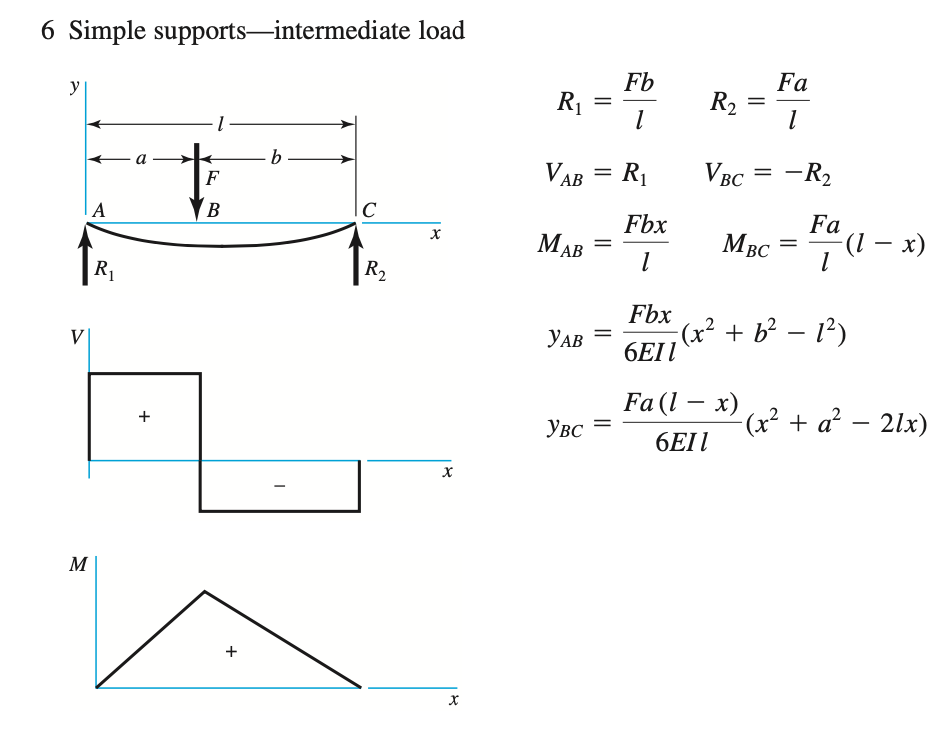

In [11]:
Image(filename='Imagenes Tareas/Superposicion S6.png')

Por continuidad, cualquiera de las funciones nos dice cual es el valor de la deflexión

In [15]:
a = 0.1
b = L-a
y_max = F*b*a*(a*a + b*b -(L*L))/(6*ei*L)
print('La deflexión máxima por superposición es de',y_max,'m')

La deflexión máxima por superposición es de -0.00012776986821450736 m


**Método de Funciones de Singularidad**

Las funciones de cortante y momento son:
\begin{equation}
    V(x) = R_a \langle x \rangle^0 - F \langle x - a\rangle^0 \\
    M(x) = R_a \langle x \rangle^1 - F \langle x - a\rangle^1 \\
\end{equation}
Integrando dos veces el momento:
\begin{equation}
   EI y(x) = \frac{R_a}{6} \langle x \rangle^3 - \frac{F}{6} \langle x - a\rangle^3 + cx \\
\end{equation}

La segunda constante de integración es cero por que en $x=0$ no hay deflexión. Usando la condicion de frontera de $y(L)=0$ se tiene que $c$ tiene un valor de -14 N·m. Evaluando en $x=a$:

\begin{equation}
    y(a) = (1/EI) \times \bigg( \frac{2100}{6} \langle 0.1 \rangle^3  -14(0.1) \bigg)
\end{equation}

In [23]:
y_m = Ra/6*(0.1**3) - 1.4
print('La deflexion por medio de funciones de singularidad es de',y_m/ei)

-0.00012776986821450733


# Encontrar el diametro dada una pendiente en un extremo

Tomando la derivada e igualandola a $1.28\times 10^{-3}$ en $x=0$ y usando la expresión de la primera derivada de la deflexión en este punto, se tiene que el radio es: 
\begin{equation}
    r = \sqrt[4]{\frac{14(4)}{E \pi (1.28\times 10^{-3})}} = 0.016 \; m
\end{equation}

Es decir que el diámetro solicitado es de 32.2 mm. La deflexión máxima se encuentra usando el método de superposicion, obviamente usando un segundo momento de inercia diferente. 

In [26]:
I2 = np.pi*(0.016**4)/4
print('El valor de la deflexión máxima en este caso es de',F*b*a*(a*a + b*b -(L*L))/(6*E*L),'m')

El valor de la deflexión máxima en este caso es de -5.072463768115942e-12 m
